In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt


In [2]:
def f(x, y):
    return np.exp(x * y)


def g(x, y):
    return x + y


In [3]:
def solve_Gauss_Seidel(A, b, tolerance=1e-7, max_iterations=1000000):
    """Gauss-Seidel 迭代法求解线性方程组"""
    start_time = time.time()

    n = len(A)
    D = np.diag(np.diag(A))
    L = -np.tril(A, -1)
    U = -np.triu(A, 1)
    D_L_inv = np.linalg.inv(D - L)
    B = D_L_inv @ U
    g = D_L_inv @ b

    x = np.zeros(n)  # 初始猜测
    for i in range(max_iterations):
        x_new = B @ x + g
        if np.linalg.norm(x_new - x, ord=2) < tolerance:
            break
        x = x_new.copy()
    else:
        print(f"Warning: Gauss-Seidel method reached max iterations ({max_iterations} times).")

    end_time = time.time()
    return x_new, i + 1, end_time - start_time


In [4]:
def square_to_flat(N, i, j):
    return i * N + j


def flat_to_square(N, k):
    return k // N, k % N


In [5]:
def func(N):
    x, y = np.ogrid[0:1:(N+1)*1j, 0:1:(N+1)*1j]
    fij = f(x, y)
    gij = g(x, y)
    h = 1 / N

    A = np.zeros(((N+1)**2, (N+1)**2))
    b = np.zeros((N+1)**2)
    for i in range(0, N+1):
        for j in range(0, N+1):
            if i == 0 or i == N or j == 0 or j == N:
                k = square_to_flat(N+1, i, j)
                A[k, k] = 1
                b[k] = 1
            else:
                k = square_to_flat(N+1, i, j)
                A[k, k] = 4 + h**2 * gij[i, j]
                A[k, square_to_flat(N+1, i-1, j)] = -1
                A[k, square_to_flat(N+1, i, j-1)] = -1
                A[k, square_to_flat(N+1, i+1, j)] = -1
                A[k, square_to_flat(N+1, i, j+1)] = -1
                b[k] = h**2 * fij[i, j]

    x, iterations, time_cost = solve_Gauss_Seidel(A, b)
    u = x.reshape((N+1, N+1))

    print(f"Time cost: {time_cost:.6f} s")
    print(f"Iterations: {iterations}")

    plt.figure(figsize=(12, 8))
    plt.imshow(u, cmap='hot', origin='lower', extent=[0, 1, 0, 1])
    plt.colorbar()
    plt.title(f"N = {N}")
    plt.show()


Time cost: 0.250120 s
Iterations: 589


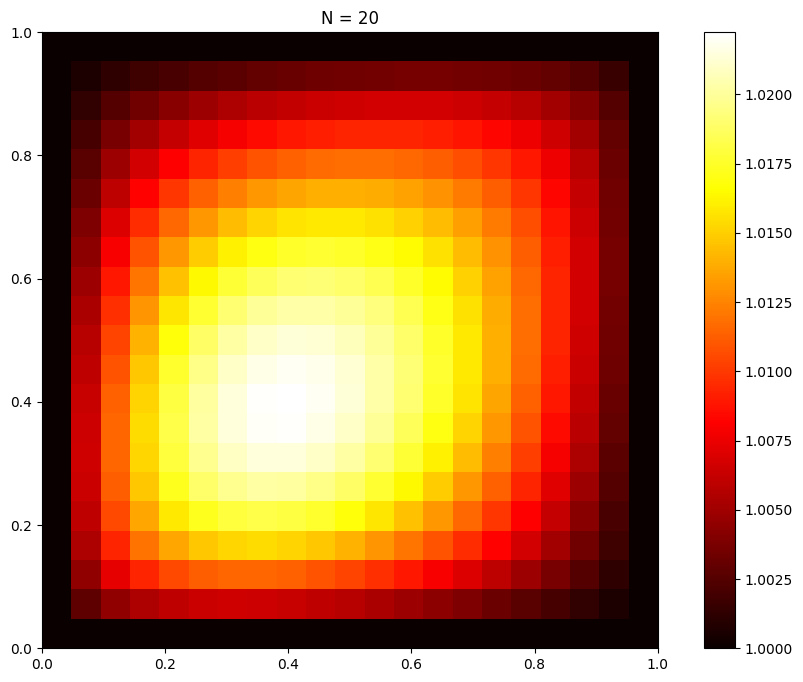

In [6]:
func(20)


Time cost: 0.876144 s
Iterations: 2249


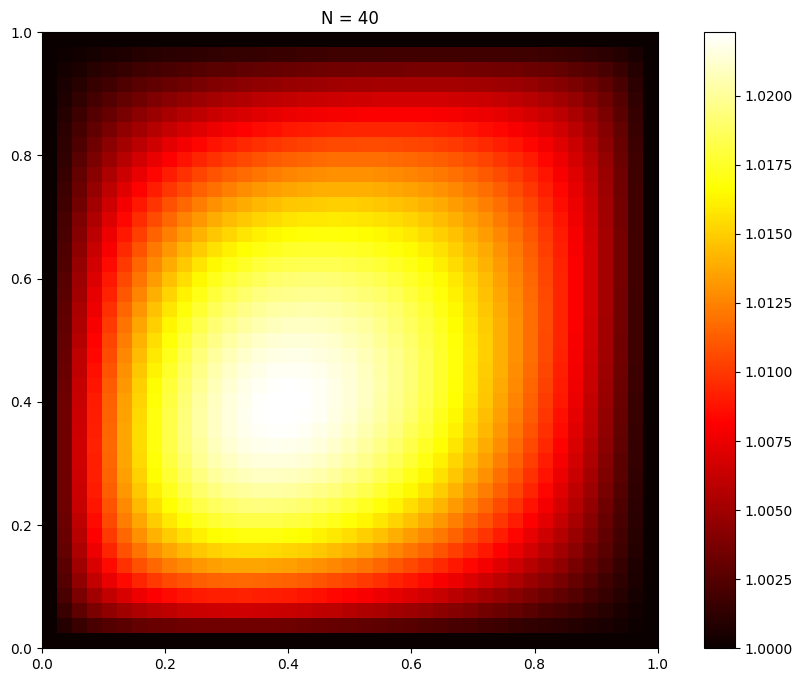

In [7]:
func(40)


Time cost: 59.103789 s
Iterations: 8567


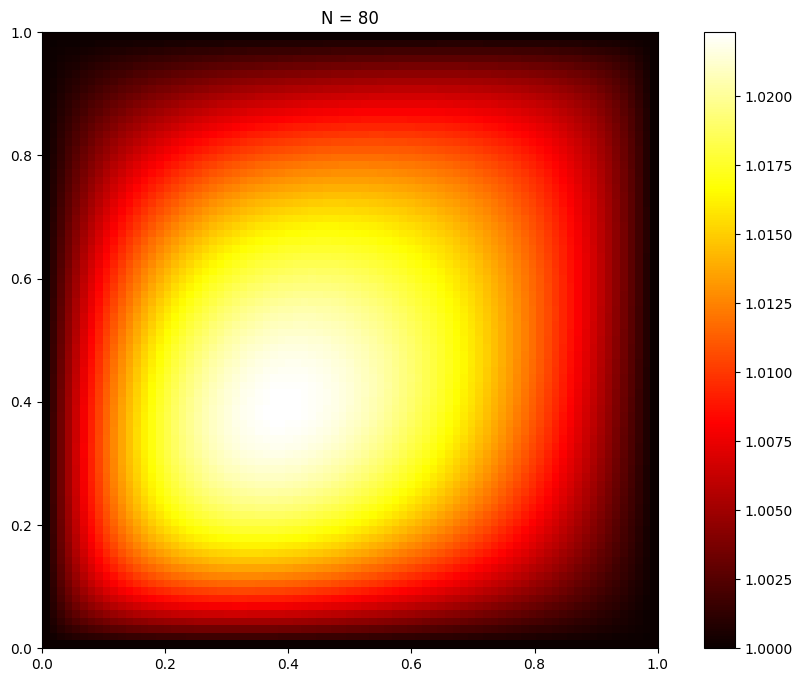

In [8]:
func(80)


| $N$ | 迭代次数 | 求解时间（秒） |
| - | - | - |
| 20 | 589 | 0.250120 |
| 40 | 2249 | 0.876144 |
| 80 | 8567 | 59.103789 |